In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pymongo import MongoClient
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [7]:
data = pd.read_csv('../data/washington_hikes_clean.csv')

In [8]:
data.head()

,Unnamed: 0,hike_name,region,length,elevation gain,rating,number_votes,features,"pass(0-no pass, 1- pass required)",which_pass,time_from_seattle,url,latlong,numReports,hike_desc,stars,total_dist,lat_long
0,0,Grand Park via Lake Eleanor,Mount Rainier Area -- NE - Sunrise/White River,"8.0 miles, roundtrip",1100.0,4.25 out of 5,12.0,"[Mountain views, Wildlife, Established campsites]",0,No pass or permit required,116.533333,http://www.wta.org/go-hiking/hikes/grand-park,http://maps.google.com/maps?hl=en&sz=11&spn=0....,212.0,The classic approach (via Sunrise) to this sea...,4.25,8.0,"46.9963,-121.6413"
1,1,Shellrock Pass,North Cascades -- Pasayten,NaN,NaN,2.33 out of 5,3.0,[Dogs allowed on leash],0,No pass or permit required,NaN,http://www.wta.org/go-hiking/hikes/shellrock-pass,NaN,2.0,The Shellrock Pass trail has not been maintain...,2.33,NaN,NaN
2,2,Soda Peaks Lake,Southwest Washington -- Lewis River Region,"7.0 miles, roundtrip",2500.0,3.00 out of 5,4.0,"[Old growth, Lakes]",1,Northwest Forest Pass required,227.333333,http://www.wta.org/go-hiking/hikes/soda-peaks-...,http://maps.google.com/maps?hl=en&sz=11&spn=0....,24.0,Take a trip to a seldom-seen part of the South...,3.00,7.0,"45.8846,-122.0001"
3,3,Shorthorn,South Cascades -- Mount Adams Area,"5.6 miles, roundtrip",1400.0,3.67 out of 5,3.0,"[Mountain views, Dogs allowed on leash]",1,Northwest Forest Pass required,207.433333,http://www.wta.org/go-hiking/hikes/shorthorn,http://maps.google.com/maps?hl=en&sz=11&spn=0....,5.0,This trail ascends the south slopes of Mount A...,3.67,5.6,"46.1989,-121.0593"
4,4,West Fork Teanaway River,Snoqualmie Region -- Salmon La Sac/Teanaway,"9.6 miles, one-way",2800.0,2.75 out of 5,4.0,"[Ridges/passes, Wildlife, Established campsite...",1,Northwest Forest Pass required,115.750000,http://www.wta.org/go-hiking/hikes/west-fork-t...,http://maps.google.com/maps?hl=en&sz=11&spn=0....,5.0,The West Fork Teanaway Trail begins at Forest ...,2.75,19.2,"47.2915,-121.0064"


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3385 entries, 0 to 3384
Data columns (total 18 columns):
Unnamed: 0                           3385 non-null int64
hike_name                            3385 non-null object
region                               3383 non-null object
length                               1593 non-null object
elevation gain                       1593 non-null float64
rating                               3384 non-null object
number_votes                         3384 non-null float64
features                             3385 non-null object
pass(0-no pass, 1- pass required)    3385 non-null int64
which_pass                           1520 non-null object
time_from_seattle                    2136 non-null float64
url                                  3385 non-null object
latlong                              2194 non-null object
numReports                           3384 non-null float64
hike_desc                            1444 non-null object
stars                

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1148e2210>]], dtype=object)

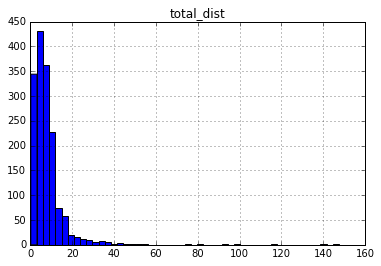

In [7]:
data.hist(column='total_dist', bins=50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x118529510>]], dtype=object)

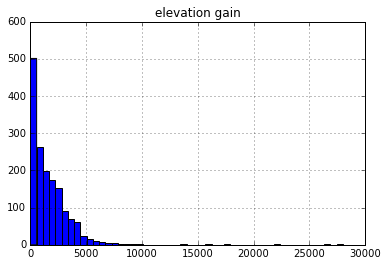

In [11]:
data.hist(column='elevation gain', bins=50)

In [15]:
stars = data['stars'].dropna()

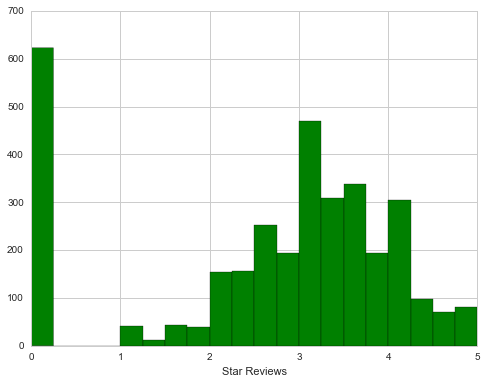

In [28]:
plt.figure(figsize=(8,6))
plt.hist(stars, color='green', bins=20)
plt.xlabel('Star Reviews')

In [12]:
data[data['elevation gain']>8000]

,hike_name,region,length,elevation gain,rating,number_votes,features,"pass(0-no pass, 1- pass required)",which_pass,time_from_seattle,url,latlong,numReports,hike_desc,stars,total_dist,lat_long
37,Boundary Trail - Pasayten,North Cascades -- Pasayten,"80.0 miles, roundtrip",9000.0,3.25 out of 5,4.0,"[Dogs allowed on leash, Ridges/passes, Summits...",1,Northwest Forest Pass required,337.600000,http://www.wta.org/go-hiking/hikes/boundary-tr...,http://maps.google.com/maps?hl=en&sz=11&spn=0....,33.0,Hiking the Boundary Trail is an adventure on m...,3.25,80.0,"48.8848,-119.8667"
156,Thunder Creek - Park Creek,North Cascades -- North Cascades Highway - Hwy 20,"55.2 miles, roundtrip",9800.0,2.75 out of 5,4.0,"[Wildlife, Rivers, Wildflowers/Meadows, Mounta...",1,NaN,148.800000,http://www.wta.org/go-hiking/hikes/park-creek-...,http://maps.google.com/maps?hl=en&sz=11&spn=0....,16.0,Note: The bridge over Thunder Creek located 14...,2.75,55.2,"48.6925,-121.0978"
281,Pacific Crest Trail (PCT) Section L - Rainy Pa...,North Cascades,"70.3 miles, one-way",13649.0,3.50 out of 5,6.0,[Fall foliage],1,NaN,180.833333,http://www.wta.org/go-hiking/hikes/pacific-cre...,http://maps.google.com/maps?hl=en&sz=11&spn=0....,33.0,After passing through the North Cascades Natio...,3.50,140.6,"48.5180,-120.7352"
783,Dark Peak,Central Cascades -- Entiat Mountains/Lake Chelan,"16.0 miles, roundtrip",8513.0,0.00 out of 5,0.0,"[Old growth, Summits, Lakes]",0,No pass or permit required,193.150000,http://www.wta.org/go-hiking/hikes/dark-peak,http://maps.google.com/maps?hl=en&sz=11&spn=0....,1.0,A scramble and climb in the North Cascades acc...,0.00,16.0,"47.9696,-120.2158"
784,Snowfield Peak,North Cascades -- North Cascades Highway - Hwy 20,"22.0 miles, roundtrip",8357.0,0.00 out of 5,0.0,[],0,No pass or permit required,NaN,http://www.wta.org/go-hiking/hikes/snowfield-peak,NaN,1.0,"A climb in the North Cascades. Climbing gear, ...",0.00,22.0,NaN
791,Pacific Crest Trail (PCT) Section K - Stevens ...,North Cascades,"117.5 miles, roundtrip",26351.0,4.00 out of 5,6.0,"[Ridges/passes, Wildlife, Established campsite...",1,Northwest Forest Pass required,105.250000,http://www.wta.org/go-hiking/hikes/pacific-cre...,http://maps.google.com/maps?hl=en&sz=11&spn=0....,90.0,There's no two ways about it: Section K is tou...,4.00,117.5,"47.7454,-121.0890"
924,Copper Ridge Loop,North Cascades -- Mount Baker Area,"34.0 miles, roundtrip",8600.0,5.00 out of 5,1.0,"[Wildlife, Established campsites, Mountain vie...",1,Northwest Forest Pass required,166.516667,http://www.wta.org/go-hiking/hikes/copper-ridg...,http://maps.google.com/maps?hl=en&sz=11&spn=0....,4.0,Experience the variety offered by the North Ca...,5.00,34.0,"48.9102,-121.5917"
926,Pacific Crest Trail (PCT) Section J - Snoqualm...,Snoqualmie Region -- Snoqualmie Pass,"74.7 miles, roundtrip",16000.0,4.33 out of 5,6.0,"[Wildlife, Lakes, Rivers, Wildflowers/Meadows,...",1,Northwest Forest Pass required,50.950000,http://www.wta.org/go-hiking/hikes/pacific-cre...,http://maps.google.com/maps?hl=en&sz=11&spn=0....,105.0,Imagine not crossing a road for 75 miles! Back...,4.33,74.7,"47.4278,-121.4135"
1015,Pacific Crest Trail (PCT) Section H - Bridge o...,South Cascades,"147.5 miles, roundtrip",27996.0,3.75 out of 5,4.0,"[Wildlife, Summits, Lakes, Rivers, Wildflowers...",1,NaN,219.733333,http://www.wta.org/go-hiking/hikes/pacific-cre...,http://maps.google.com/maps?hl=en&sz=11&spn=0....,34.0,Offering spectacular views of the three southe...,3.75,147.5,"45.8026,-121.9325"
1205,Luna Peak,North Cascades -- North Cascades Highway - Hwy 20,"36.5 miles, roundtrip",8009.0,0.00 out of 5,0.0,"[Summits, Fall foliage]",1,National Park/Refuge entry fee required,NaN,http://www.wta.org/go-hiking/hikes/luna-peak,http://maps.google.com/maps?hl=en&sz=11&spn=0....,1.0,The tallest peak in the Picket Range of the No...,0.00,36.5,"48.8784,-121.2527"


In [21]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [8]:
data.columns

Index([u'hike_name', u'region', u'length', u'elevation gain', u'rating',
       u'number_votes', u'features', u'pass(0-no pass, 1- pass required)',
       u'which_pass', u'time_from_seattle', u'url', u'latlong', u'numReports',
       u'hike_desc', u'stars', u'total_dist', u'lat_long'],
      dtype='object')

In [13]:
features = [u'elevation gain', u'number_votes', u'pass(0-no pass, 1- pass required)',
        u'time_from_seattle', u'numReports', u'stars', u'total_dist']

In [17]:
X = data[features]
X.dropna(inplace=True)

/Users/Jade/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [23]:
reduced_data = PCA(n_components=2).fit_transform(X)
kmeans = KMeans(init='k-means++', n_init=10)
kmeans.fit(reduced_data)


KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=8, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [5]:
sns.set_style("whitegrid")

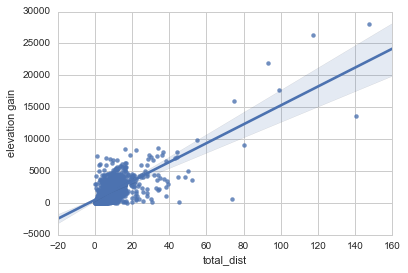

In [16]:
sns.regplot(data['total_dist'], data['elevation gain'])

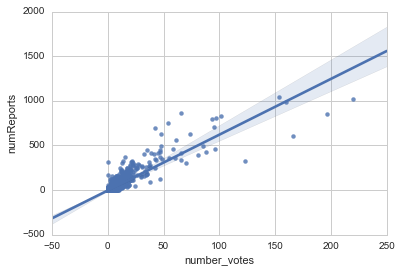

In [17]:
sns.regplot(data['number_votes'], data['numReports'])

(0, 5.2)

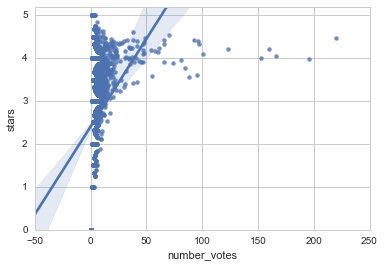

In [21]:
sns.regplot(data['number_votes'], data['stars'])
plt.ylim(ymax=5.2, ymin=0)

(0, 5.2)

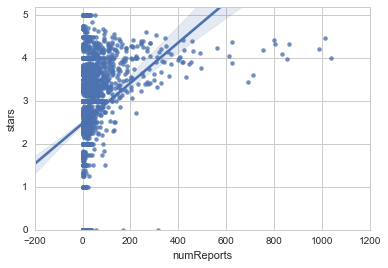

In [22]:
sns.regplot(data['numReports'], data['stars'])
plt.ylim(ymax=5.2, ymin=0)

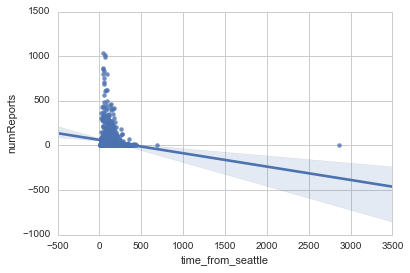

In [25]:
sns.regplot(data['time_from_seattle'], data['numReports'])

In [26]:
data['time_from_seattle'].describe()

count    2136.000000
mean      145.054323
std        96.744202
min         4.916667
25%        92.179167
50%       138.133333
75%       186.862500
max      2863.283333
Name: time_from_seattle, dtype: float64

In [28]:
data[data['time_from_seattle']==max(data['time_from_seattle'])]

,hike_name,region,length,elevation gain,rating,number_votes,features,"pass(0-no pass, 1- pass required)",which_pass,time_from_seattle,url,latlong,numReports,hike_desc,stars,total_dist,lat_long
658,Mount Spokane State Park - Mount Kit Carson Lo...,Eastern Washington -- Spokane Area/Coeur d'Alene,"13.0 miles, roundtrip",1300.0,0.00 out of 5,0.0,"[Mountain views, Wildlife, Waterfalls, Old gro...",1,Discover Pass required,2863.283333,http://www.wta.org/go-hiking/hikes/mount-spoka...,http://maps.google.com/maps?hl=en&sz=11&spn=0....,6.0,"Beginning in 1909, Spokane park visionary Fran...",0.0,13.0,"44.7212,-70.2491"


In [29]:
data['numReports'].describe()

count    3384.000000
mean       27.577719
std        73.039463
min         0.000000
25%         2.000000
50%         6.000000
75%        23.000000
max      1040.000000
Name: numReports, dtype: float64

In [38]:
np.percentile(data['numReports'].dropna(), 80)

30.0

In [44]:
data[data['numReports']>=64].tail()

,hike_name,region,length,elevation gain,rating,number_votes,features,"pass(0-no pass, 1- pass required)",which_pass,time_from_seattle,url,latlong,numReports,hike_desc,stars,total_dist,lat_long
3074,Chatter Creek,Central Cascades -- Stevens Pass - East,NaN,NaN,4.00 out of 5,4.0,[],1,Northwest Forest Pass required,167.366667,http://www.wta.org/go-hiking/hikes/chatter-creek,http://maps.google.com/maps?hl=en&sz=11&spn=0....,102.0,NaN,4.00,NaN,"47.6100,-120.8902"
3098,Boulder-De Roux / Gallagher Head Lake,Snoqualmie Region -- Salmon La Sac/Teanaway,NaN,NaN,3.40 out of 5,5.0,[],1,NaN,134.916667,http://www.wta.org/go-hiking/hikes/boulder-de-...,http://maps.google.com/maps?hl=en&sz=11&spn=0....,97.0,NaN,3.40,NaN,"47.4174,-120.9361"
3125,Beverly Turnpike,Snoqualmie Region -- Salmon La Sac/Teanaway,NaN,NaN,2.33 out of 5,6.0,[],1,Northwest Forest Pass required,121.466667,http://www.wta.org/go-hiking/hikes/beverly-tur...,http://maps.google.com/maps?hl=en&sz=11&spn=0....,132.0,NaN,2.33,NaN,"47.3892,-120.8725"
3326,Sunrise Mine,North Cascades -- Mountain Loop Highway,NaN,NaN,3.40 out of 5,5.0,[],1,NaN,102.816667,http://www.wta.org/go-hiking/hikes/sunrise-mine,http://maps.google.com/maps?hl=en&sz=11&spn=0....,97.0,NaN,3.40,NaN,"48.0259,-121.4795"
3338,Stafford Creek,Snoqualmie Region -- Salmon La Sac/Teanaway,NaN,NaN,2.50 out of 5,8.0,[],1,NaN,117.716667,http://www.wta.org/go-hiking/hikes/stafford-creek,http://maps.google.com/maps?hl=en&sz=11&spn=0....,137.0,NaN,2.50,NaN,"47.3781,-120.8248"


In [6]:
data[data['time_from_seattle']==min(data['time_from_seattle'])]

,hike_name,region,length,elevation gain,rating,number_votes,features,"pass(0-no pass, 1- pass required)",which_pass,time_from_seattle,url,latlong,numReports,hike_desc,stars,total_dist,lat_long
1523,City Hall to Pike Place,Puget Sound and Islands -- Seattle-Tacoma Area,NaN,NaN,0.00 out of 5,0.0,[],0,No pass or permit required,4.916667,http://www.wta.org/go-hiking/hikes/city-hall-t...,http://maps.google.com/maps?hl=en&sz=11&spn=0....,3.0,"The route starts at Seattle City Hall, jogs do...",0.0,NaN,"47.6095,-122.3415"


In [9]:
data[(data['time_from_seattle']<80) & (data['total_dist']<10) & (data['elevation gain']>3000)]

,hike_name,region,length,elevation gain,rating,number_votes,features,"pass(0-no pass, 1- pass required)",which_pass,time_from_seattle,url,latlong,numReports,hike_desc,stars,total_dist,lat_long
79,Bandera Mountain,Snoqualmie Region -- North Bend Area,"8.0 miles, roundtrip",3400.0,4.23 out of 5,61.0,"[Ridges/passes, Dogs allowed on leash, Fall fo...",1,Northwest Forest Pass required,56.150000,http://www.wta.org/go-hiking/hikes/bandera-mou...,http://maps.google.com/maps?hl=en&sz=11&spn=0....,561.0,Bandera Mountain is a chameleon. Most would de...,4.23,8.0,"47.4247,-121.5836"
82,Granite Mountain,Snoqualmie Region -- Snoqualmie Pass,"8.6 miles, roundtrip",3800.0,4.33 out of 5,66.0,"[Mountain views, Dogs allowed on leash, Summit...",1,Northwest Forest Pass required,47.200000,http://www.wta.org/go-hiking/hikes/granite-mou...,http://maps.google.com/maps?hl=en&sz=11&spn=0....,864.0,The astounding views from the summit of the Gr...,4.33,8.6,"47.3979,-121.4860"
87,Mailbox Peak,Snoqualmie Region -- North Bend Area,"9.4 miles, roundtrip",4000.0,4.00 out of 5,24.0,"[Summits, Fall foliage]",1,Discover Pass required,42.816667,http://www.wta.org/go-hiking/hikes/mailbox-peak,http://maps.google.com/maps?hl=en&sz=11&spn=0....,220.0,This hike will have weekly closures during the...,4.00,9.4,"47.4675,-121.6748"
90,Mount Si,Snoqualmie Region -- North Bend Area,"8.0 miles, roundtrip",3150.0,3.99 out of 5,153.0,"[Old growth, Summits, Wildlife]",1,Discover Pass required,40.266667,http://www.wta.org/go-hiking/hikes/mount-si,http://maps.google.com/maps?hl=en&sz=11&spn=0....,1040.0,"In the legends of the Snoqualmie people, Mount...",3.99,8.0,"47.4880,-121.7231"
251,Mount Washington,Snoqualmie Region -- Snoqualmie Pass,"8.5 miles, roundtrip",3250.0,3.86 out of 5,35.0,"[Mountain views, Dogs allowed on leash, Establ...",1,Discover Pass required,38.283333,http://www.wta.org/go-hiking/hikes/mount-washi...,http://maps.google.com/maps?hl=en&sz=11&spn=0....,446.0,Ditch the North Bend crowds by heading six mil...,3.86,8.5,"47.4420,-121.6722"
335,Mount Si - Old Trail,Snoqualmie Region -- North Bend Area,"7.4 miles, roundtrip",3420.0,4.46 out of 5,13.0,"[Mountain views, Wildlife, Waterfalls, Old gro...",1,Discover Pass required,43.233333,http://www.wta.org/go-hiking/hikes/mount-si-ol...,http://maps.google.com/maps?hl=en&sz=11&spn=0....,135.0,The “old” trail that ascends Mount Si’s wester...,4.46,7.4,"47.4408,-121.6253"
354,West Defiance - Putrid Pete's Peak,Snoqualmie Region -- North Bend Area,"6.8 miles, roundtrip",3020.0,3.83 out of 5,6.0,"[Mountain views, Summits]",1,Northwest Forest Pass required,56.150000,http://www.wta.org/go-hiking/hikes/west-defiance,http://maps.google.com/maps?hl=en&sz=11&spn=0....,89.0,Hike the Ira Spring trail for to the first swi...,3.83,6.8,"47.4267,-121.5864"
670,Mailbox Peak - Old Trail,Snoqualmie Region -- North Bend Area,"5.2 miles, roundtrip",4000.0,4.33 out of 5,97.0,"[Wildflowers/Meadows, Mountain views, Dogs all...",1,Discover Pass required,42.816667,http://www.wta.org/go-hiking/hikes/mailbox-pea...,http://maps.google.com/maps?hl=en&sz=11&spn=0....,803.0,This hike will have weekly closures during the...,4.33,5.2,"47.4674,-121.6748"
742,Granite Mountain Snowshoe,Snoqualmie Region -- Snoqualmie Pass,"5.0 miles, roundtrip",3750.0,4.00 out of 5,4.0,[],1,NaN,47.466667,http://www.wta.org/go-hiking/hikes/granite-mou...,http://maps.google.com/maps?hl=en&sz=11&spn=0....,81.0,"Regardless of the air temperature, be prepared...",4.00,5.0,"47.3979,-121.4878"
785,Chair Peak,Snoqualmie Region -- Snoqualmie Pass,"9.0 miles, roundtrip",6244.0,0.00 out of 5,0.0,"[Dogs allowed on leash, Summits]",1,Northwest Forest Pass required,54.666667,http://www.wta.org/go-hiking/hikes/chair-peak,http://maps.google.com/maps?hl=en&sz=11&spn=0....,2.0,A scramble of a peak in the Alpine Lakes Wilde...,0.00,9.0,"47.4154,-121.4433"


## Finding and Removing Outliers 

In [89]:
df = pd.read_csv('data/washington_hikes_clean.csv')
df.shape

(3385, 18)

In [90]:
df = df[~(np.abs(df['elevation gain']-df['elevation gain'].mean())>(3*df['elevation gain'].std()))]

In [94]:
df = df[~(np.abs(df['total_dist']-df['total_dist'].mean())>(3*df['total_dist'].std()))]

In [95]:
df.shape

(3337, 18)

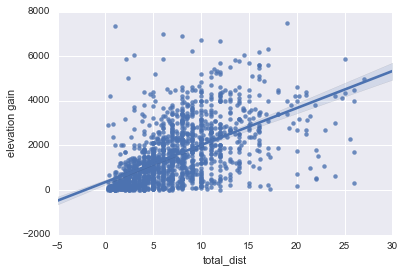

In [96]:
sns.regplot(df['total_dist'], df['elevation gain'])

In [97]:
df.to_csv('data/washington_hikes_clean_noout.csv', index_col=0)